EDA

Analysis hypothesis:

1) IBAMA features correlates with deforestation.

2) There is correlation between IBAMA features.

In [148]:
import os
import pandas as pd
import geopandas as gpd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("..//..")

import config
from utils import compute_frames

# H1: Correlation with deforestation

In [9]:
# load frames deforestation area history
deforestation = pd.read_csv(config.TR_DEFORESTATION, index_col=0)
deforestation["date"] = pd.to_datetime(deforestation["date"], format="%Y-%m-%d")

In [12]:
# load ibama data
ibama = pd.read_csv(config.TR_IBAMA)

In [15]:
# map deforestation area
ibama["defor_area"] = ibama["frame_id"].map(deforestation.groupby("frame_id")["area"].sum()).fillna(0)

In [25]:
ibama["defor_bool"] = ibama["defor_area"] > 0

In [69]:
ibama.shape

(4114141, 20)

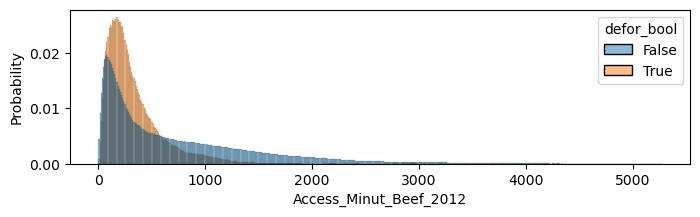

,defor_area,defor_bool,Access_Minut_Beef_2012
defor_area,1.000000,0.597714,-0.081014
defor_bool,0.597714,1.000000,-0.151504
Access_Minut_Beef_2012,-0.081014,-0.151504,1.000000


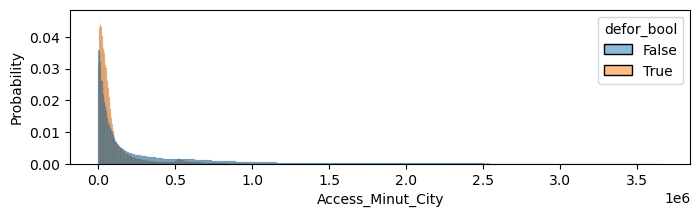

,defor_area,defor_bool,Access_Minut_City
defor_area,1.000000,0.597714,-0.074812
defor_bool,0.597714,1.000000,-0.128791
Access_Minut_City,-0.074812,-0.128791,1.000000


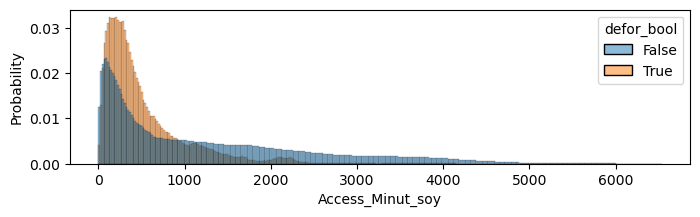

,defor_area,defor_bool,Access_Minut_soy
defor_area,1.000000,0.597714,-0.104755
defor_bool,0.597714,1.000000,-0.169069
Access_Minut_soy,-0.104755,-0.169069,1.000000


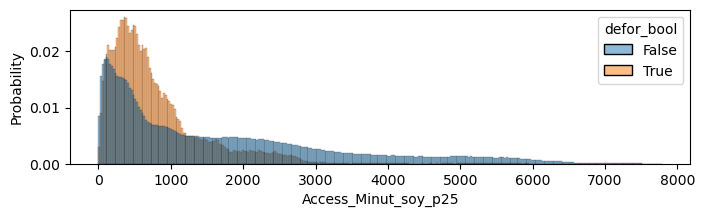

,defor_area,defor_bool,Access_Minut_soy_p25
defor_area,1.000000,0.597714,-0.107277
defor_bool,0.597714,1.000000,-0.160051
Access_Minut_soy_p25,-0.107277,-0.160051,1.000000


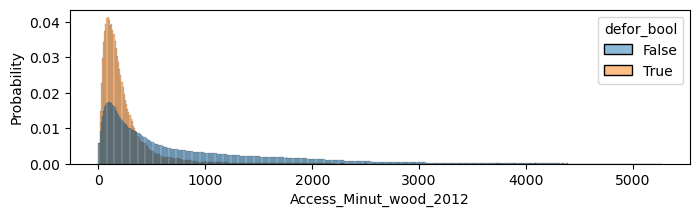

,defor_area,defor_bool,Access_Minut_wood_2012
defor_area,1.000000,0.597714,-0.110649
defor_bool,0.597714,1.000000,-0.192671
Access_Minut_wood_2012,-0.110649,-0.192671,1.000000


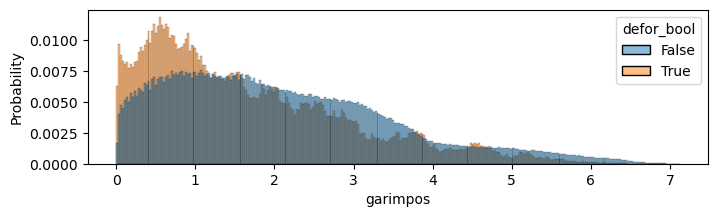

,defor_area,defor_bool,garimpos
defor_area,1.000000,0.597714,-0.059794
defor_bool,0.597714,1.000000,-0.083307
garimpos,-0.059794,-0.083307,1.000000


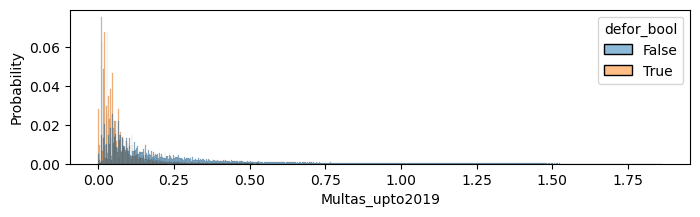

,defor_area,defor_bool,Multas_upto2019
defor_area,1.000000,0.597714,-0.106636
defor_bool,0.597714,1.000000,-0.181500
Multas_upto2019,-0.106636,-0.181500,1.000000


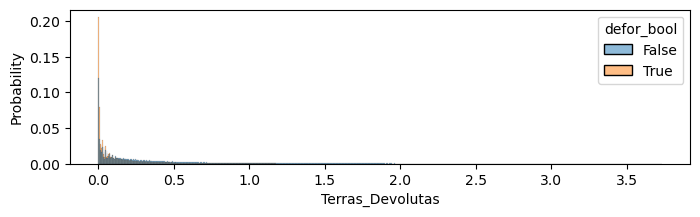

,defor_area,defor_bool,Terras_Devolutas
defor_area,1.000000,0.597714,-0.035588
defor_bool,0.597714,1.000000,-0.097191
Terras_Devolutas,-0.035588,-0.097191,1.000000


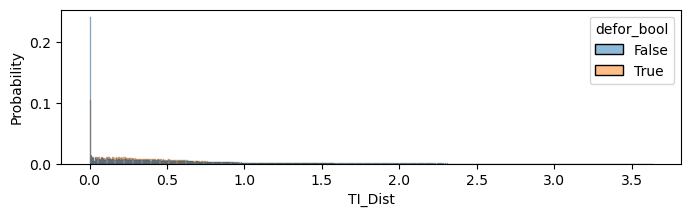

,defor_area,defor_bool,TI_Dist
defor_area,1.000000,0.597714,-0.022587
defor_bool,0.597714,1.000000,-0.015501
TI_Dist,-0.022587,-0.015501,1.000000


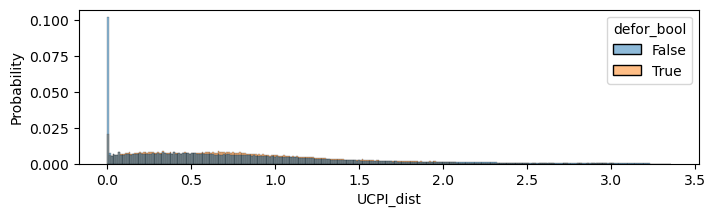

,defor_area,defor_bool,UCPI_dist
defor_area,1.000000,0.597714,0.004789
defor_bool,0.597714,1.000000,-0.000199
UCPI_dist,0.004789,-0.000199,1.000000


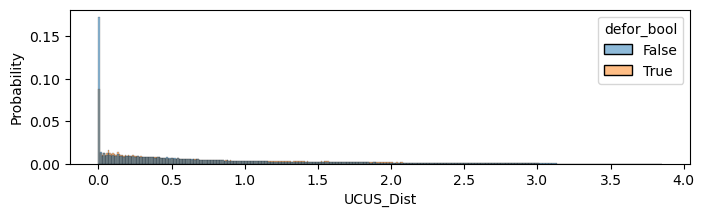

,defor_area,defor_bool,UCUS_Dist
defor_area,1.000000,0.597714,0.082856
defor_bool,0.597714,1.000000,0.031427
UCUS_Dist,0.082856,0.031427,1.000000


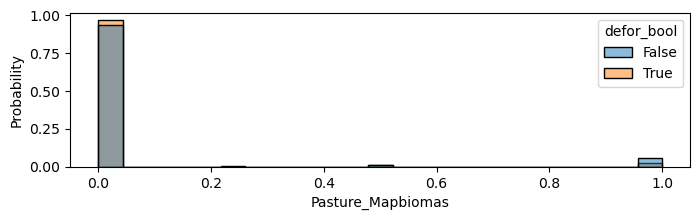

,defor_area,defor_bool,Pasture_Mapbiomas
defor_area,1.000000,0.597714,-0.034550
defor_bool,0.597714,1.000000,-0.041077
Pasture_Mapbiomas,-0.034550,-0.041077,1.000000


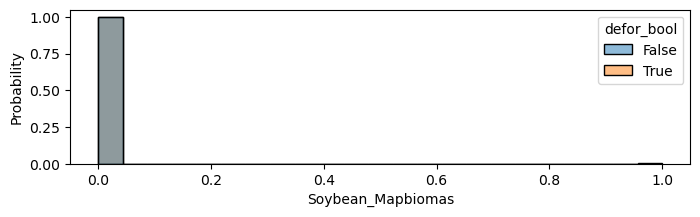

,defor_area,defor_bool,Soybean_Mapbiomas
defor_area,1.000000,0.597714,-0.005270
defor_bool,0.597714,1.000000,-0.008786
Soybean_Mapbiomas,-0.005270,-0.008786,1.000000


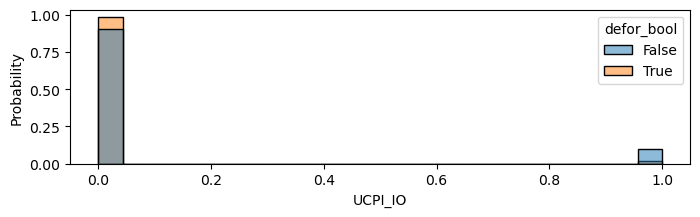

,defor_area,defor_bool,UCPI_IO
defor_area,1.000000,0.597714,-0.046608
defor_bool,0.597714,1.000000,-0.078119
UCPI_IO,-0.046608,-0.078119,1.000000


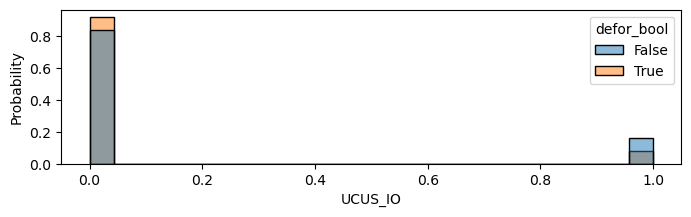

,defor_area,defor_bool,UCUS_IO
defor_area,1.000000,0.597714,-0.045964
defor_bool,0.597714,1.000000,-0.063439
UCUS_IO,-0.045964,-0.063439,1.000000


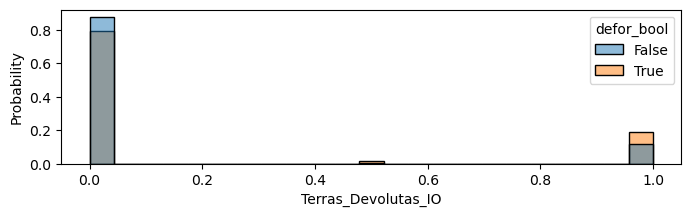

,defor_area,defor_bool,Terras_Devolutas_IO
defor_area,1.000000,0.597714,0.028629
defor_bool,0.597714,1.000000,0.065695
Terras_Devolutas_IO,0.028629,0.065695,1.000000


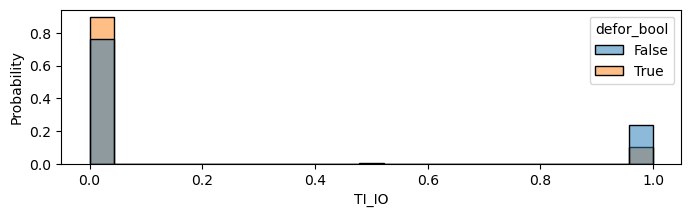

,defor_area,defor_bool,TI_IO
defor_area,1.000000,0.597714,-0.026912
defor_bool,0.597714,1.000000,-0.090913
TI_IO,-0.026912,-0.090913,1.000000


In [77]:
for col in ibama.columns[1:-2]:

    fig, ax = plt.subplots(figsize=(8, 2), sharex=True)
    sns.histplot(ibama, x=col, hue="defor_bool", ax=ax, stat="probability", common_norm=False)
    plt.show()

    display(ibama[["defor_area", "defor_bool", col]].corr())

# H2: Correlation between vars

In [81]:
ibama.shape

(4114141, 20)

In [126]:
high_corr_ibama = pd.melt(ibama.sample(10_000).corr(), ignore_index=False).reset_index()\
    .query("index != variable")\
    .query("abs(value) > 0.7")\
    .sort_values("value")\
    .drop_duplicates("value", keep="first")

In [127]:
high_corr_ibama

,index,variable,value
47,Multas_upto2019,Access_Minut_City,0.706854
104,Access_Minut_soy_p25,Access_Minut_wood_2012,0.716859
145,Access_Minut_wood_2012,Multas_upto2019,0.718066
43,Access_Minut_soy,Access_Minut_City,0.744293
65,Access_Minut_wood_2012,Access_Minut_soy,0.775758
23,Access_Minut_soy,Access_Minut_Beef_2012,0.777854
45,Access_Minut_wood_2012,Access_Minut_City,0.845907
22,Access_Minut_City,Access_Minut_Beef_2012,0.849858
25,Access_Minut_wood_2012,Access_Minut_Beef_2012,0.924100
83,Access_Minut_soy,Access_Minut_soy_p25,0.941326


In [128]:
high_corr_ibama_vars = set(list(high_corr_ibama["index"].values) + list(high_corr_ibama["variable"].values))
high_corr_ibama_vars

{'Access_Minut_Beef_2012',
 'Access_Minut_City',
 'Access_Minut_soy',
 'Access_Minut_soy_p25',
 'Access_Minut_wood_2012',
 'Multas_upto2019'}

C:\Users\giovanni\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


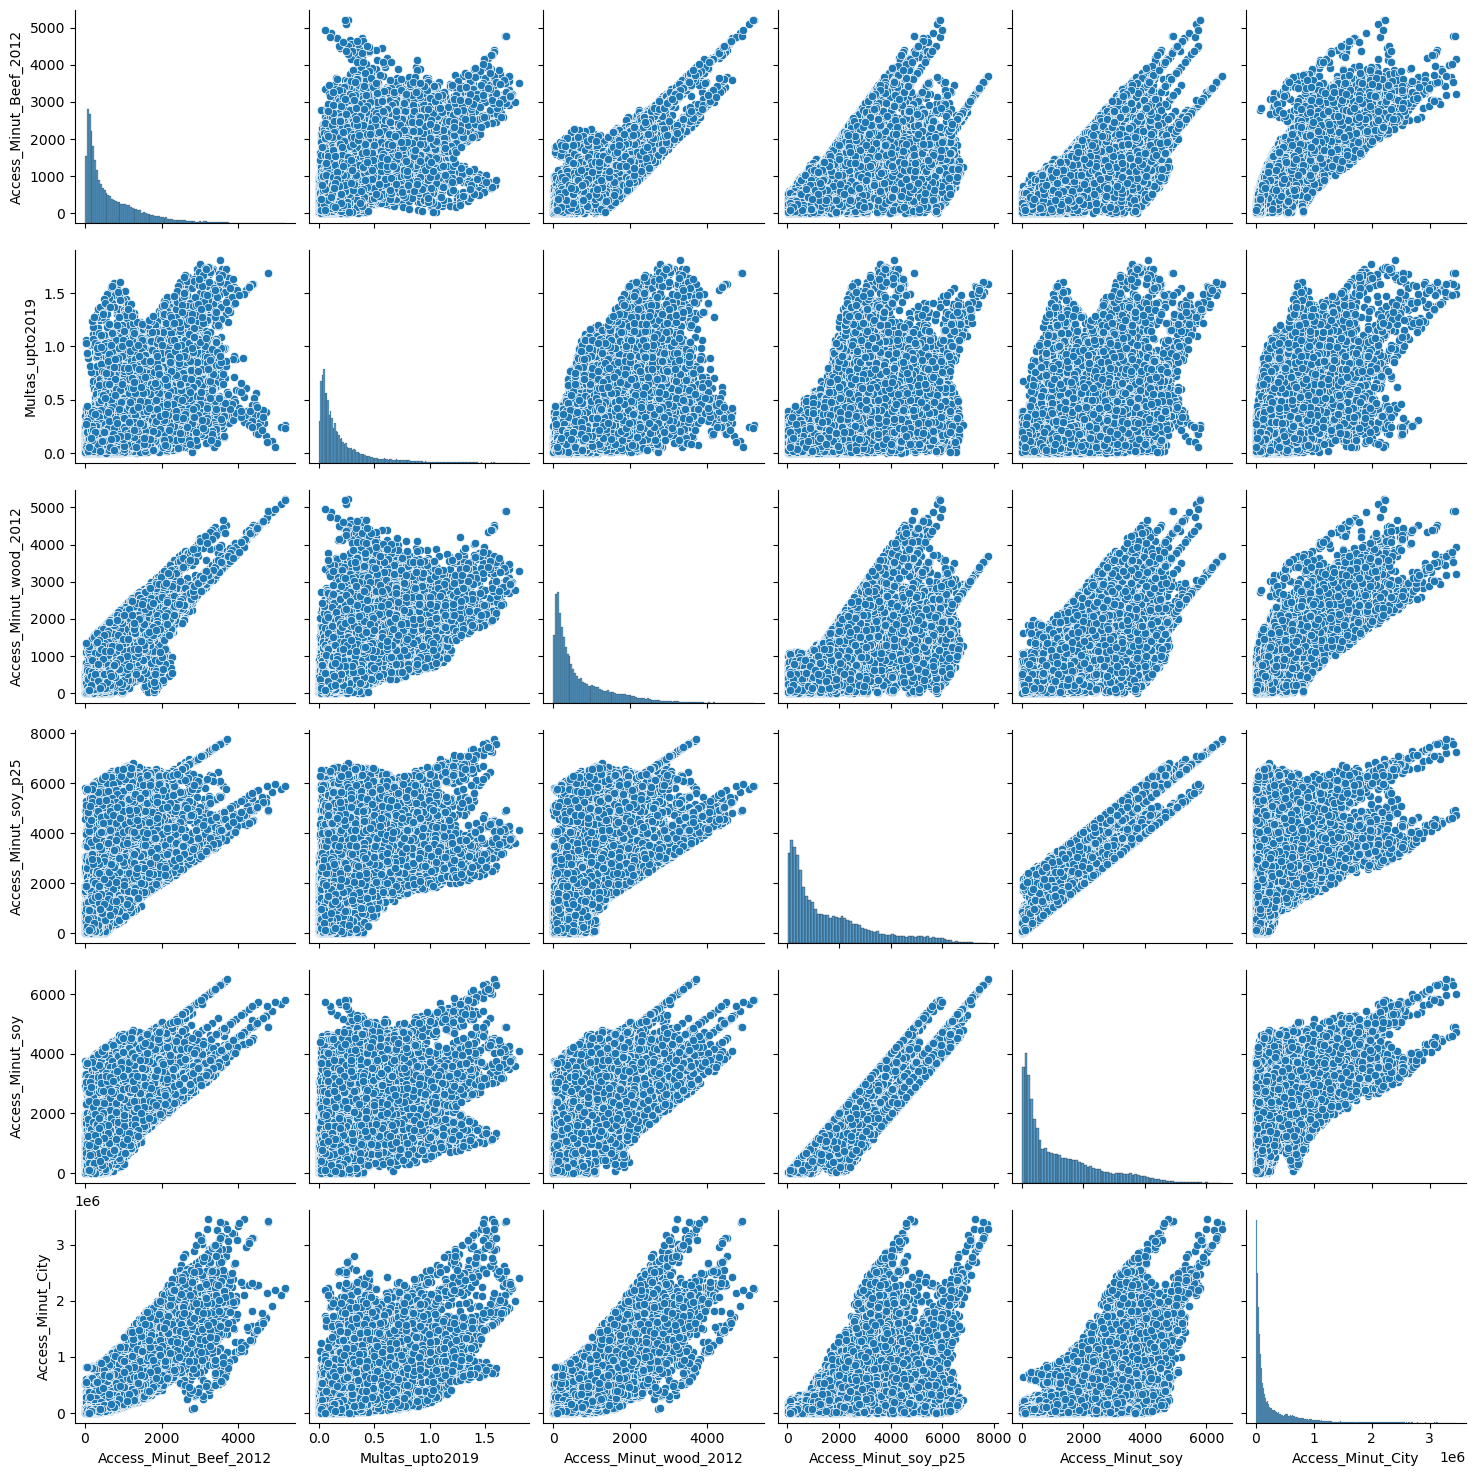

In [114]:
sns.pairplot(
    ibama[list(high_corr_ibama_vars)].sample(frac=0.01)
)

## Plot example

In [157]:
import numpy as np

In [130]:
# load legal amazon limits
am_bounds = gpd.read_file(config.AMAZON_FRONTIER_DATA)

Region: (800, 1000, 800, 1000)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

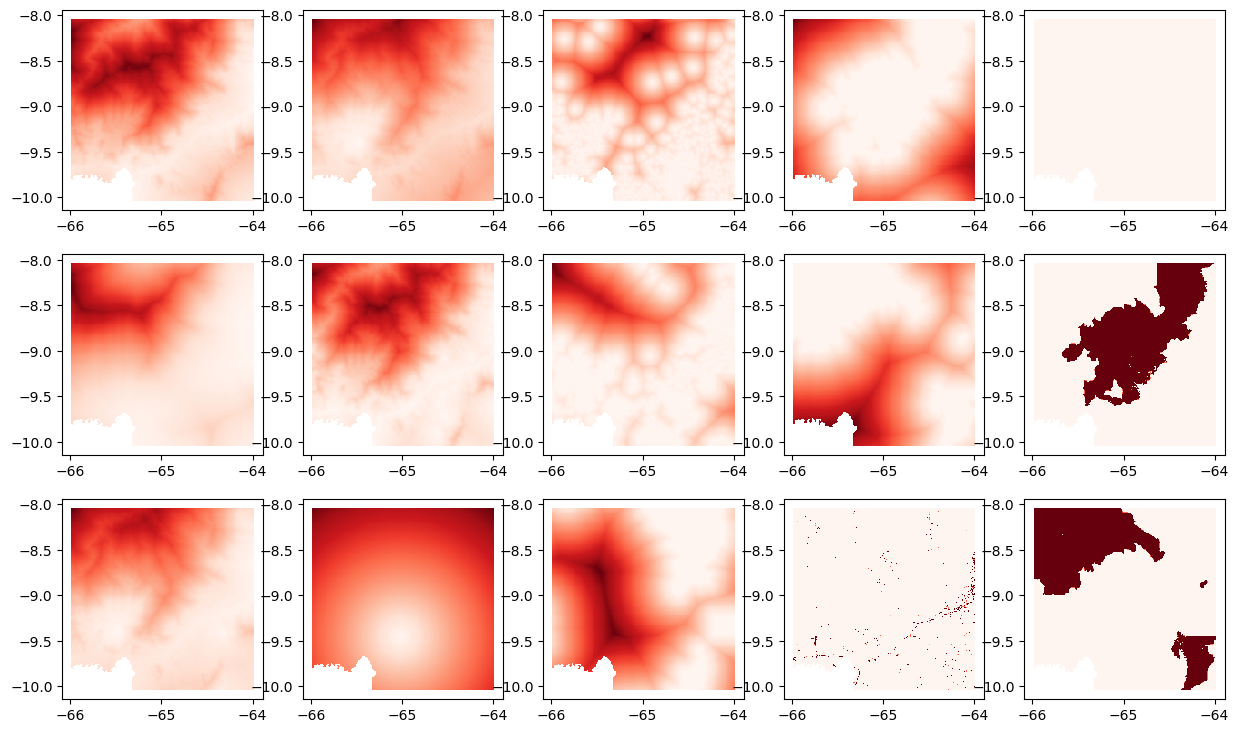

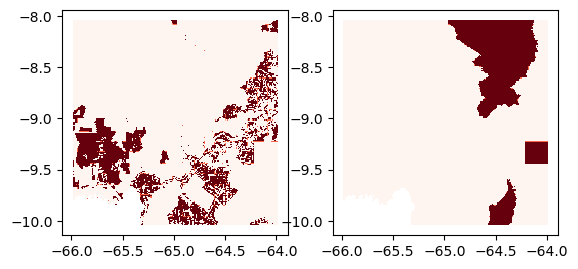

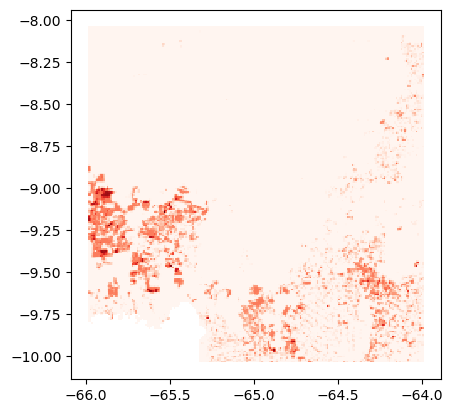

Region: (1200, 1400, 2000, 2200)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

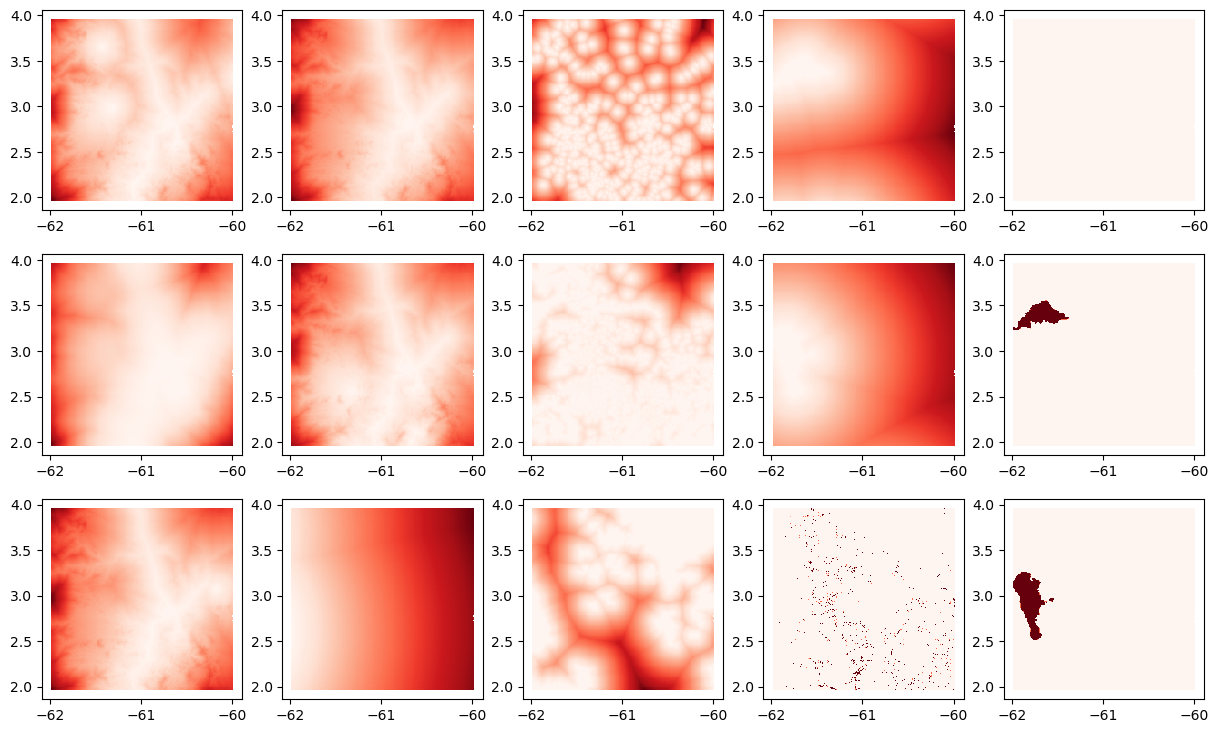

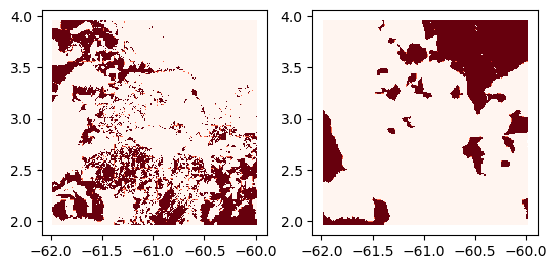

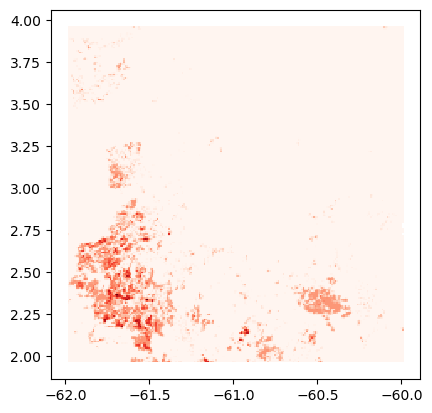

Region: (1900, 2100, 500, 700)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

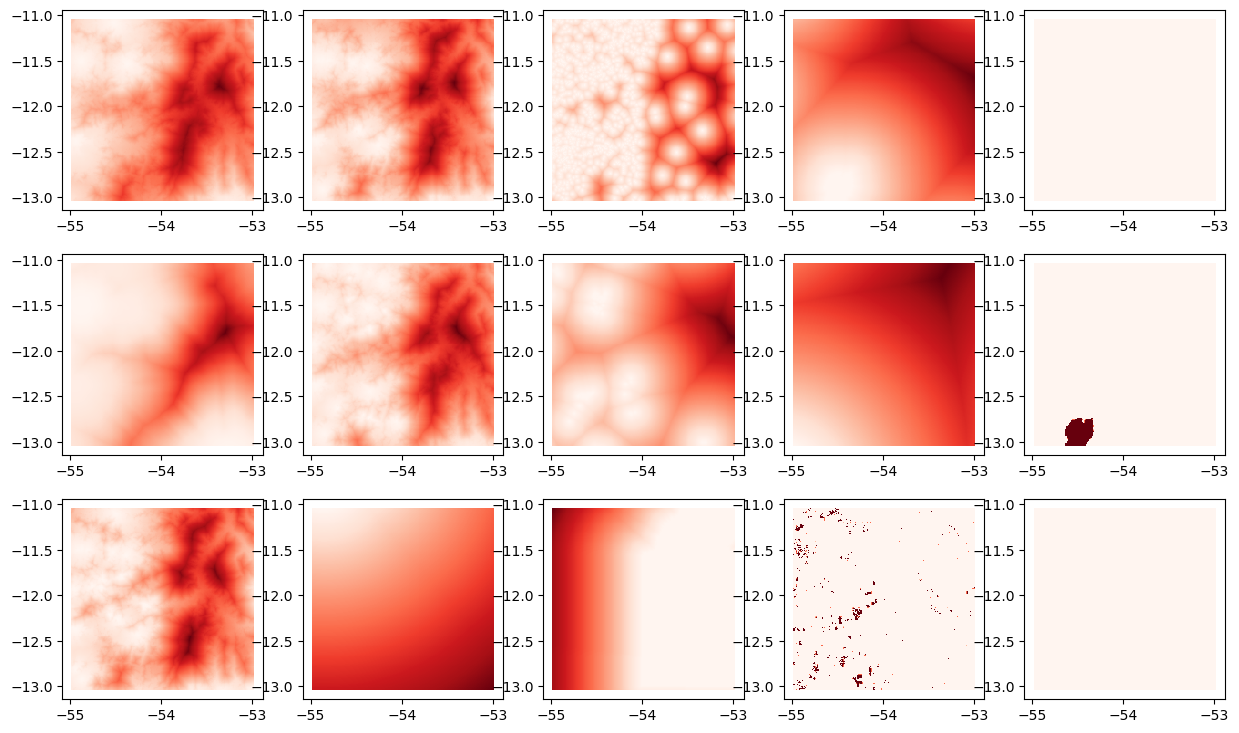

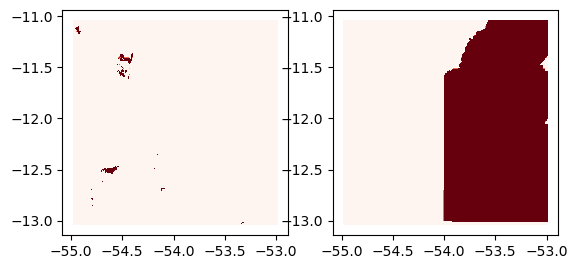

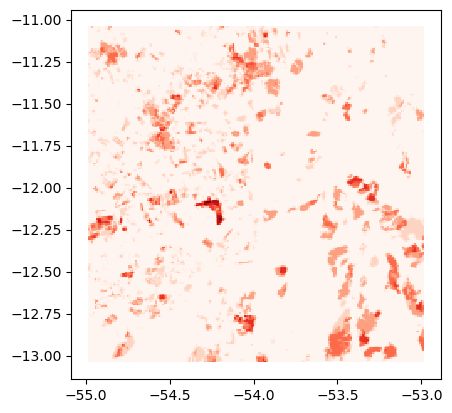

Region: (2500, 2700, 1400, 1600)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

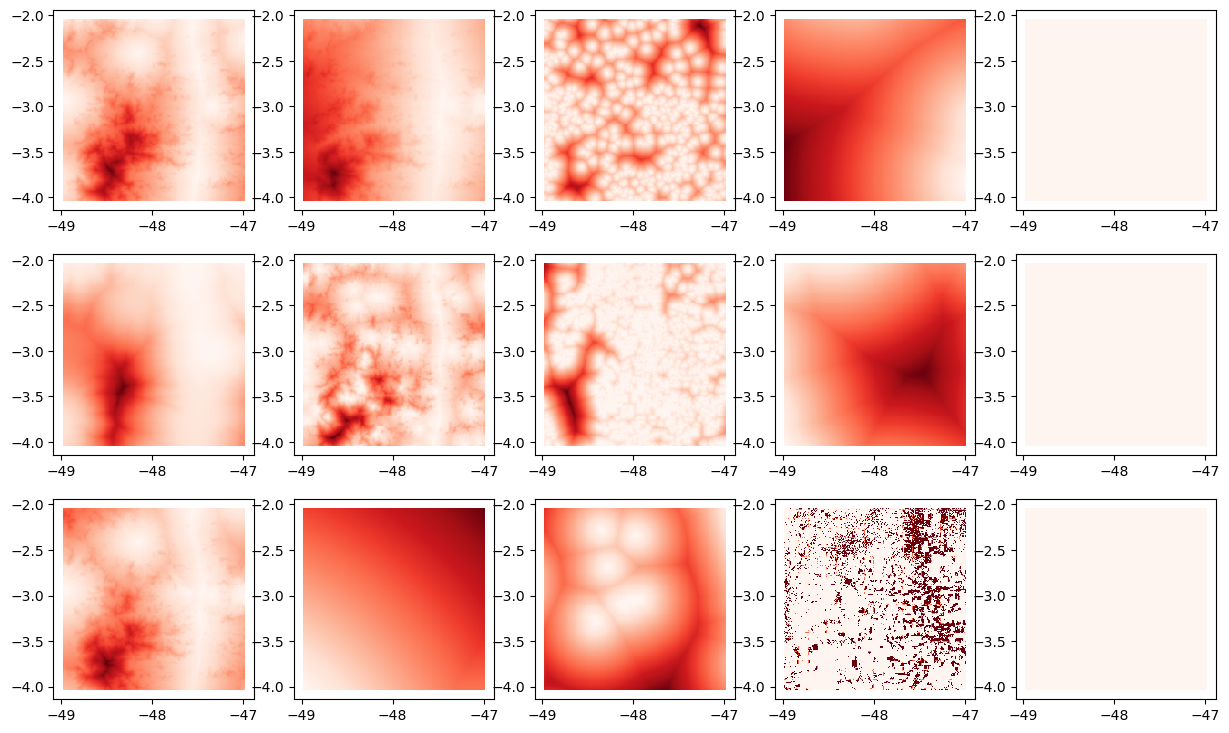

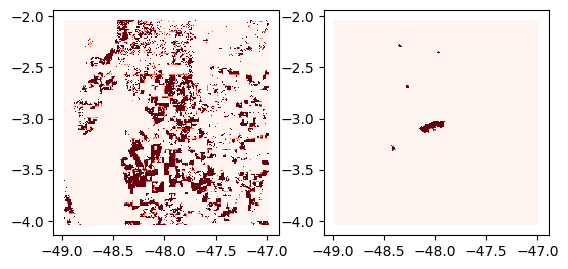

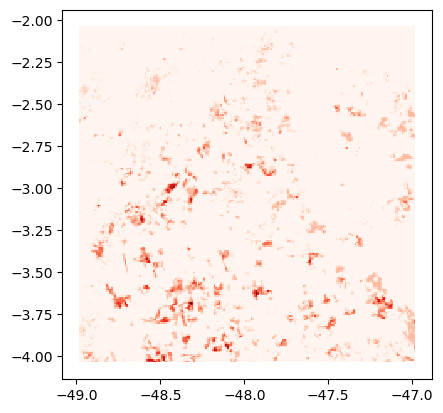

In [169]:
regions = [
    (800, 1000, 800, 1000),
    (1200, 1400, 2000, 2200),
    (1900, 2100, 500, 700),
    (2500, 2700, 1400, 1600),
]

reg = regions[0]
for reg in regions:
    print("Region:", reg)

    region_poly = compute_frames(
        am_bounds.total_bounds, 
        config.BOX_SIDE, 
        *reg
    )

    region_poly = region_poly.merge(ibama, on="frame_id", how="left", validate="1:1")
    
    col_list = ibama.columns[1:-2]

    fig, ax = plt.subplots(3, 5, figsize=(15,9))
    for icol, col in tqdm(enumerate(col_list[:15])):
        jcol = icol // 3
        region_poly.plot(ax=ax[icol % 3, jcol], column=col, cmap="Reds")

    fig, ax = plt.subplots(1, 2) 
    for icol, col in tqdm(enumerate(col_list[15:])):
        region_poly.plot(ax=ax[icol], column=col, cmap="Reds")

    fig, ax = plt.subplots() 
    region_poly.plot(ax=ax, column="defor_area", cmap="Reds")

    plt.show()

In [170]:
ibama.columns

Index(['frame_id', 'Access_Minut_Beef_2012', 'Access_Minut_City',
       'Access_Minut_soy', 'Access_Minut_soy_p25', 'Access_Minut_wood_2012',
       'garimpos', 'Multas_upto2019', 'Terras_Devolutas', 'TI_Dist',
       'UCPI_dist', 'UCUS_Dist', 'Pasture_Mapbiomas', 'Soybean_Mapbiomas',
       'UCPI_IO', 'UCUS_IO', 'Terras_Devolutas_IO', 'TI_IO', 'defor_area',
       'defor_bool'],
      dtype='object')